# REGRESSION 
##### la facciamo lineare non lineare, prima una variabile x e una y, poi vediamo come varia la y se si aggiunge una x in più; infine proviamo a predirre due target vriable

## Librerie e apertura df

In [3]:
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
from sklearn.model_selection import train_test_split
#noi abbiamo già il test set però lo importo per un di più

In [5]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [6]:
train= pd.read_csv('train_reg_pulito.csv', skipinitialspace= True )
train.head()
#dft.info()

,startYear,runtimeMinutes,awardWins,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,averageRating
0,1995,58,0,1,0,21,1,tvEpisode,0,0,0,1,0,781,['US'],"Action,Adventure,Animation",7.5
1,1982,58,0,1,0,1,0,videoGame,0,0,0,1,0,11,['XWG'],Action,5.9
2,1992,58,0,1,0,24,0,movie,0,0,0,1,1,38,['RU'],Comedy,5.7
3,2021,58,0,22,0,56,0,tvSeries,0,1,0,1,0,15,['MX'],Reality-TV,5.7
4,2020,80,1,347,2,47,4,tvSeries,1,1,0,32,452,15746,['KR'],"Comedy,Drama,Romance",8.0


In [7]:
test= pd.read_csv('test_reg_pulito.csv', skipinitialspace= True)
test.head()

,startYear,runtimeMinutes,awardWins,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,averageRating
0,2015,21,0,7,2,11,0,video,0,0,0,1,0,15,['US'],"Music,Short",9.6
1,1999,60,0,10,0,40,9,movie,0,0,0,4,8,304,['HK'],Horror,4.3
2,2023,60,0,2,0,6,0,tvSpecial,0,0,0,1,0,10,['US'],Reality-TV,8.8
3,2020,60,0,0,0,52,0,tvEpisode,0,0,0,1,0,11,['GB'],Game-Show,6.9
4,1999,90,0,2,0,44,1,tvEpisode,0,0,0,1,0,145,['DE'],"Crime,Drama,Mystery",6.0


## Mettere variabili da usare qui

In [9]:
trainqt= train.copy()
trainqt= trainqt[['runtimeMinutes', 'awardWins', 'totalImages', 'averageRating',
                 'totalVideos', 'totalCredits', 'criticReviewsTotal',
                  'awardNominationsExcludeWins', 'numRegions', 'ratingCount', 'userReviewsTotal'
                 ]]

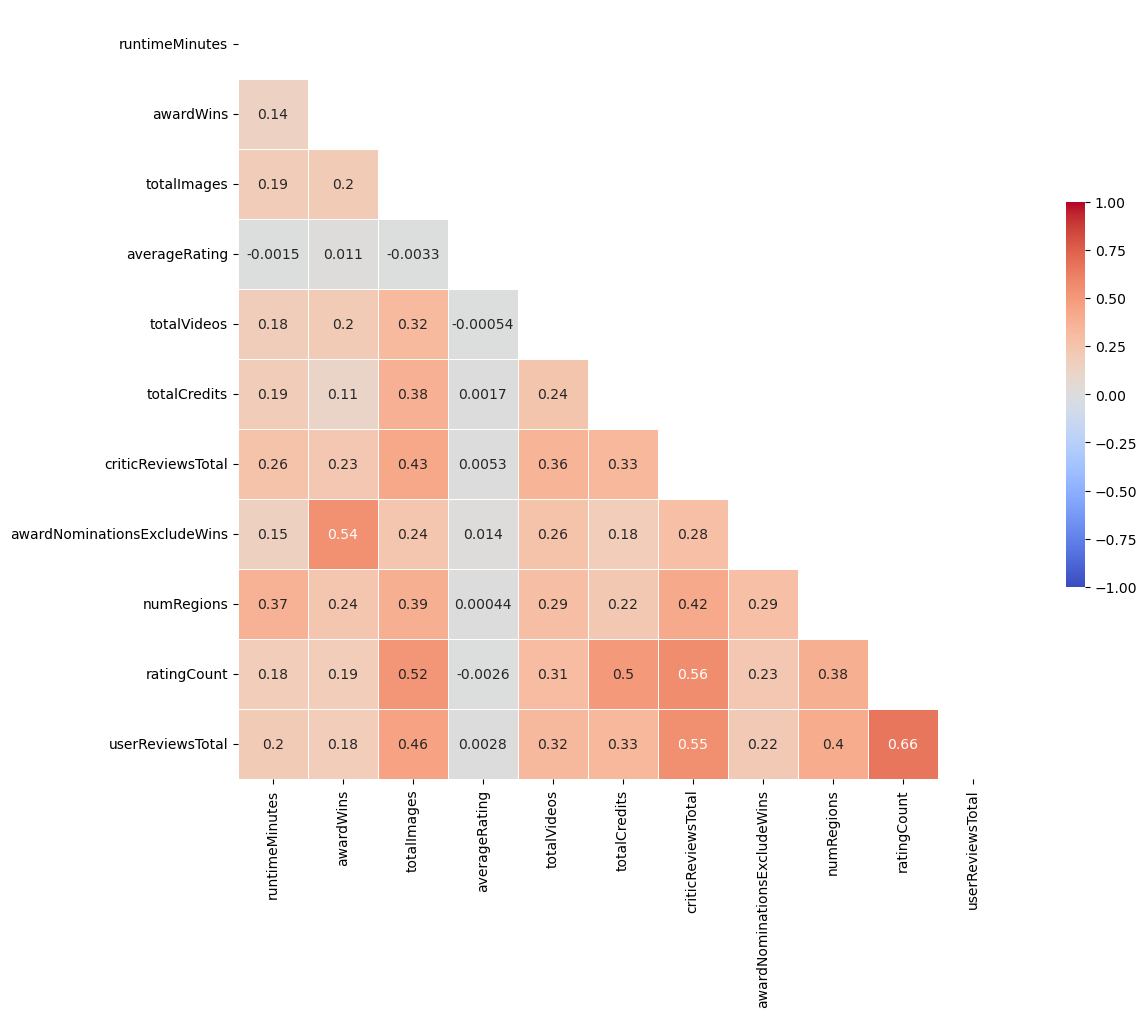

In [10]:
#vedere in base alla correlazione
# Calcola la correlazione di Spearman
corr_spearman = trainqt.corr(method='spearman')

# Crea una maschera per la parte superiore del triangolo
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

# Imposta le dimensioni della figura
plt.figure(figsize=(15, 10))

# Genera una heatmap personalizzata
sns.heatmap(corr_spearman, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Mostra la figura
plt.show()

In [11]:
#sostituisci questi quando vuoi cambiare variabili
xname="criticReviewsTotal"
yname="averageRating"

In [12]:
# # Calcola il numero di osservazioni prima del filtro
# initial_train_count = len(train)
# initial_test_count = len(test)

# # Applica il filtro ai dataset
# train = train[train[xname] <= 20]
# test = test[test[xname] <= 20]

# # Calcola il numero di osservazioni dopo il filtro
# filtered_train_count = len(train)
# filtered_test_count = len(test)

# # Percentuali rispetto al totale
# train_percentage = (filtered_train_count / initial_train_count) * 100
# test_percentage = (filtered_test_count / initial_test_count) * 100

# # Stampa i risultati
# print(f"Train set: {initial_train_count} -> {filtered_train_count} ({train_percentage:.2f}%)")
# print(f"Test set: {initial_test_count} -> {filtered_test_count} ({test_percentage:.2f}%)")


In [13]:
#vengono orrende sia con runtime e rating count
#mettiamo un filtro ai dati da usare?

# Simple Regression

In [15]:
media_r= train['averageRating'].mean()
print(media_r)
#se r2 è 0, allora l'intercetta è la media stessa

6.706530214424951


In [16]:
x_train = train[xname].values.reshape(-1, 1)
#si fa x avere una matrice 2d richiesta dall'algoritmo
y_train = train[yname].values

x_test = test[xname].values.reshape(-1, 1)
y_test = test[yname].values

## Linear Regression
####
LinearRegression

    plain Ordinary Least Squares (scipy.linalg.lstsq) or Non Negative Least Squares (scipy.optimize.nnls) wrapped as a predictor object
    
Ridge

    Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients with l2 regularization.
Lasso

    The Lasso is a linear model that estimates sparse coefficients with l1 regularization.
ElasticNet

    Elastic-Net is a linear regression model trained with both l1 and l2 -norm regularization of the coefficients.

per più info:

    https://www.pluralsight.com/resources/blog/guides/linear-lasso-ridge-regression-scikit-learn

In [18]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [19]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.00039529]
Intercept: 
 6.705477435250736


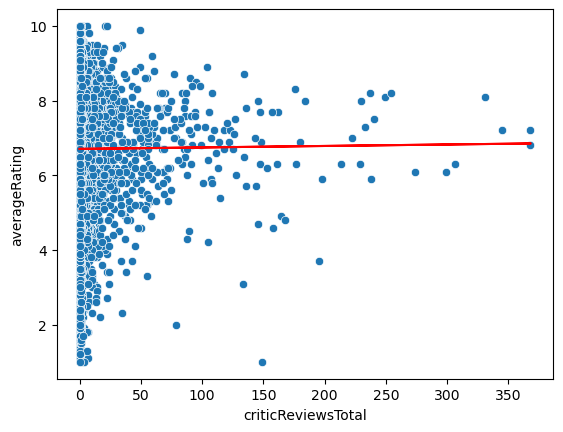

In [20]:
sns.scatterplot(data=train, x= xname, y=yname)
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")
#plt.savefig("linreg.png", dpi=300, bbox_inches="tight")


In [21]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.000
MSE: 1.833
MAE: 1.062


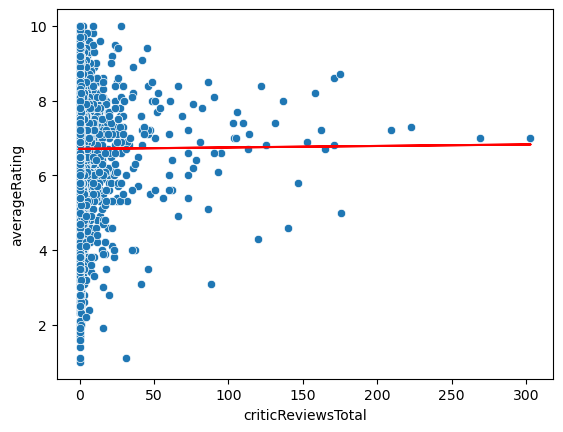

In [22]:
sns.scatterplot(data=test, x=xname, y=yname)
plt.plot(x_test, reg.coef_[0]*x_test+reg.intercept_, c="red")

## Determina gli alpha per ogni regressione

In [24]:
from sklearn.model_selection import GridSearchCV
X_train_scaled= x_train.copy()
X_test_scaled= x_test.copy()
# Assumiamo che X_train e y_train siano già definiti

# 2. Definire i parametri da testare per ciascun modello
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
param_grid_elasticnet = {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.2, 0.5, 0.8]}

# 3. Eseguire la ricerca su griglia per Ridge
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train_scaled, y_train)
best_alpha_ridge = grid_search_ridge.best_params_['alpha']
print(f"Best alpha for Ridge: {best_alpha_ridge}")

# 4. Eseguire la ricerca su griglia per Lasso
lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_scaled, y_train)
best_alpha_lasso = grid_search_lasso.best_params_['alpha']
print(f"Best alpha for Lasso: {best_alpha_lasso}")

# 5. Eseguire la ricerca su griglia per ElasticNet
elasticnet = ElasticNet()
grid_search_elasticnet = GridSearchCV(elasticnet, param_grid_elasticnet, cv=5, scoring='neg_mean_squared_error')
grid_search_elasticnet.fit(X_train_scaled, y_train)
best_alpha_elasticnet = grid_search_elasticnet.best_params_['alpha']
best_l1_ratio_elasticnet = grid_search_elasticnet.best_params_['l1_ratio']
print(f"Best alpha for ElasticNet: {best_alpha_elasticnet}, Best l1_ratio for ElasticNet: {best_l1_ratio_elasticnet}")

# 6. Calcolare e stampare gli errori per ciascun modello con i migliori parametri
# Ridge
ridge_best = Ridge(alpha=best_alpha_ridge)
ridge_best.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_best.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"MSE for Ridge: {mse_ridge}")

# Lasso
lasso_best = Lasso(alpha=best_alpha_lasso)
lasso_best.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_best.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"MSE for Lasso: {mse_lasso}")

# ElasticNet
elasticnet_best = ElasticNet(alpha=best_alpha_elasticnet, l1_ratio=best_l1_ratio_elasticnet)
elasticnet_best.fit(X_train_scaled, y_train)
y_pred_elasticnet = elasticnet_best.predict(X_test_scaled)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
print(f"MSE for ElasticNet: {mse_elasticnet}")


Best alpha for Ridge: 100
Best alpha for Lasso: 1
Best alpha for ElasticNet: 1, Best l1_ratio for ElasticNet: 0.2
MSE for Ridge: 1.8329476097556812
MSE for Lasso: 1.8330907625731159
MSE for ElasticNet: 1.8330907625731159


### Ridge

In [26]:
reg = Ridge(alpha=100)
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.00039528]
Intercept: 
 6.705477468998286


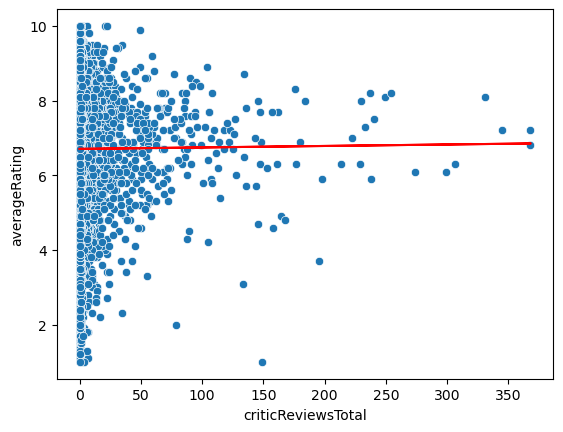

In [27]:
sns.scatterplot(data=train, x=xname, y=yname)
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

In [28]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.000
MSE: 1.833
MAE: 1.062


### Lasso

In [30]:
reg = Lasso()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.]
Intercept: 
 6.706530214424951


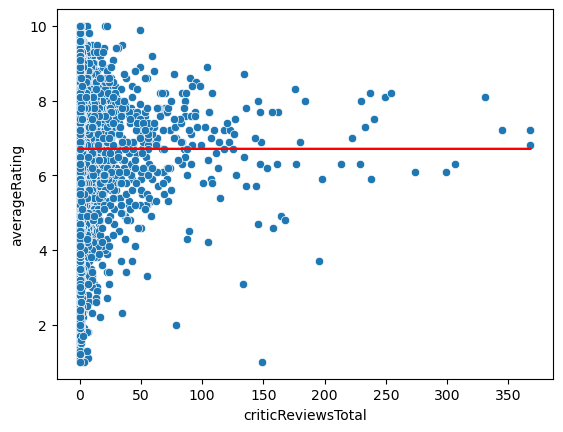

In [31]:
sns.scatterplot(data=train,x=xname, y=yname)
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

In [32]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 1.833
MAE: 1.063


## Nonlinear regression

### Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Definire il modello
dtr = DecisionTreeRegressor(random_state=42)

# Definire il range dei parametri da testare
param_grid = {
    'max_depth': [None] + list(np.arange(2, 20)),  # Profondità massima dell'albero
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100],   # Minimo numero di campioni per dividere un nodo
    'min_samples_leaf': [1, 2, 5, 10, 20, 30, 50, 100]  # Minimo numero di campioni in una foglia
}

# Configurare la GridSearchCV
grid_search = GridSearchCV(
    estimator=dtr, 
    param_grid=param_grid, 
    scoring='neg_mean_squared_error',  # Valutazione basata sull'errore quadratico medio
    cv=5,                              # Cross-validation a 5 fold
    n_jobs=-1,                         # Utilizzare tutti i core disponibili
    verbose=1                          # Output dettagliato per il progresso
)

# Adattare il modello ai dati di training
grid_search.fit(x_train, y_train)

# Stampare i migliori parametri e il punteggio corrispondente
print("Best parameters:", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)


Fitting 5 folds for each of 1064 candidates, totalling 5320 fits
Best parameters: {'max_depth': 2, 'min_samples_leaf': 50, 'min_samples_split': 2}
Best score (MSE): 1.837687553521405


In [36]:
regdt = DecisionTreeRegressor(max_depth= 2, min_samples_leaf=50, min_samples_split=2)


In [37]:
regdt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=50)

In [38]:
y_pred = regdt.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.001
MSE: 1.834
MAE: 1.063


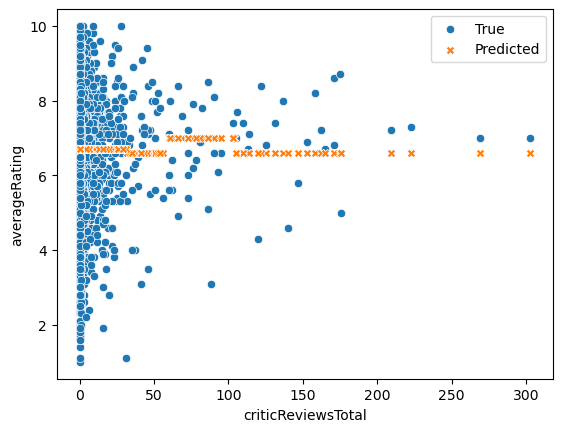

In [39]:
sns.scatterplot(data=test, x=xname, y=yname, label="True")
sns.scatterplot(data=test, x=xname, y=regdt.predict(x_test), label="Predicted", marker="X")
plt.legend()
plt.show()

### KNN Regressor

In [41]:
#Andiamo a vedere che valori usare degli hyper par
# Definire il modello
knn = KNeighborsRegressor()

# Definire il range dei parametri da testare
param_grid = {
    'n_neighbors': [3, 5, 10, 15, 20, 30, 50],  # Numero di vicini
    'weights': ['uniform', 'distance']         # Peso dei vicini
}

# Configurare la GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Adattare il modello ai dati di training
grid_search.fit(x_train, y_train)

# Stampare i migliori parametri e il punteggio corrispondente
print("Best parameters:", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)


Best parameters: {'n_neighbors': 50, 'weights': 'uniform'}
Best score (MSE): 1.8652335905094084


In [42]:
regkn = KNeighborsRegressor()

In [43]:
regkn.fit(x_train, y_train)

KNeighborsRegressor()

In [44]:
y_pred = regkn.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.264
MSE: 2.317
MAE: 1.247


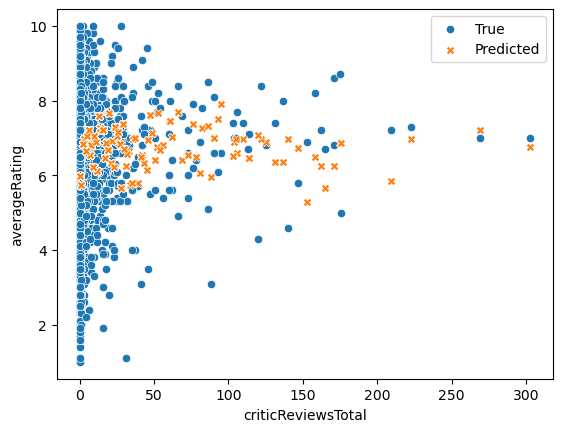

In [45]:
sns.scatterplot(data=test, x=xname, y=yname, label="True")
sns.scatterplot(data=test, x=xname, y=regkn.predict(x_test), label="Predicted", marker="X")
plt.legend()
plt.show()

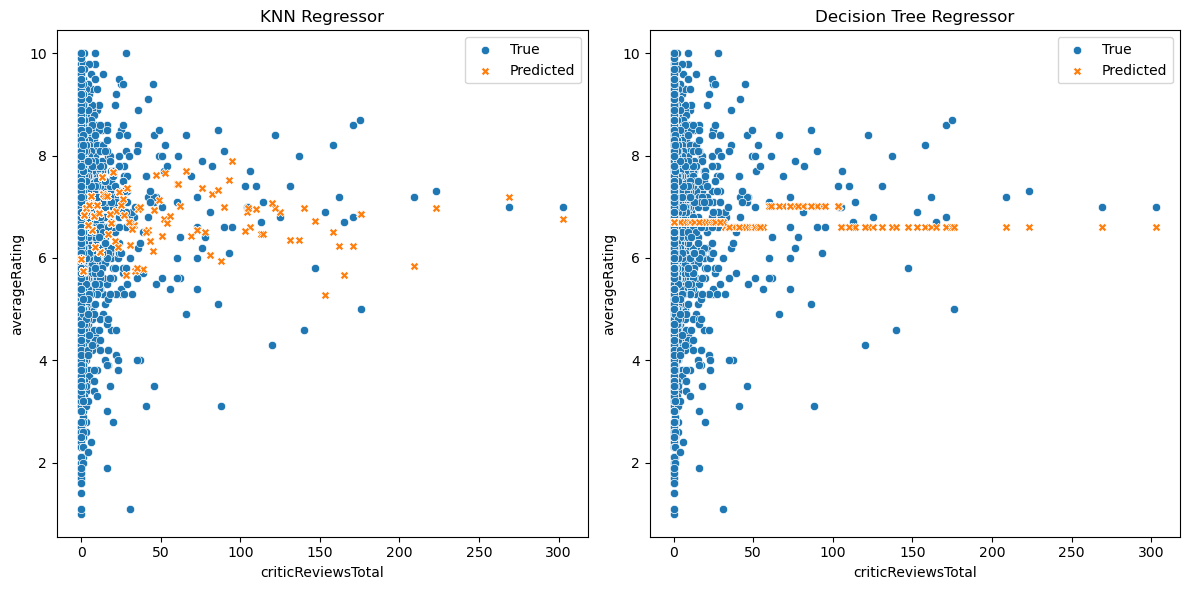

In [46]:
# Creare una figura con due subplot affiancati
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatterplot per il KNN Regressor
sns.scatterplot(data=test, x=xname, y=yname, label="True", ax=axes[0])
sns.scatterplot(data=test, x=xname, y=regkn.predict(x_test), label="Predicted", marker="X", ax=axes[0])
axes[0].set_title("KNN Regressor")
axes[0].legend()

# Scatterplot per il Decision Tree Regressor
sns.scatterplot(data=test, x=xname, y=yname, label="True", ax=axes[1])
sns.scatterplot(data=test, x=xname, y=regdt.predict(x_test), label="Predicted", marker="X", ax=axes[1])
axes[1].set_title("Decision Tree Regressor")
axes[1].legend()

# Mostrare i plot
plt.savefig("nonlin.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

# Multiple Regression

In [48]:
x_train = train[[xname, "awardWins", "awardNominationsExcludeWins","totalCredits" ]].values
y_train = train[yname].values

x_test = test[[xname, "awardWins", "awardNominationsExcludeWins","totalCredits" ]].values
y_test = test[yname].values


## LinearRegression

In [50]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [51]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 1.833
MAE: 1.062


In [52]:
# sns.scatterplot(data=test, x=xname, y=yname, label="True")
# sns.scatterplot(data=test, x=xname, y=reg.predict(X_test), label="Predicted", marker="X")
# plt.legend()
# plt.show()

## Ridge

In [54]:
reg = Ridge(alpha=100)
reg.fit(x_train, y_train)

Ridge(alpha=100)

In [55]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 1.833
MAE: 1.062


In [56]:
# sns.scatterplot(data=test, x=xname, y=yname, label="True")
# sns.scatterplot(data=test, x=xname, y=reg.predict(X_test), label="Predicted", marker="X")
# plt.legend()
# plt.show()

## Lasso

In [58]:
reg = Lasso(alpha=100)

In [59]:
reg.fit(x_train, y_train)

Lasso(alpha=100)

In [60]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 1.833
MAE: 1.063


In [61]:
# sns.scatterplot(data=test, x='ratingCount', y=yname, label="True")
# sns.scatterplot(data=test, x='ratingCount', y=reg.predict(x_test), label="Predicted", marker="X")
# plt.legend()
# plt.show()

## Nonlinear Regression

### KNN Regressor

In [64]:
reg = KNeighborsRegressor()

In [65]:
reg.fit(x_train, y_train)

KNeighborsRegressor()

In [66]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.190
MSE: 2.181
MAE: 1.156


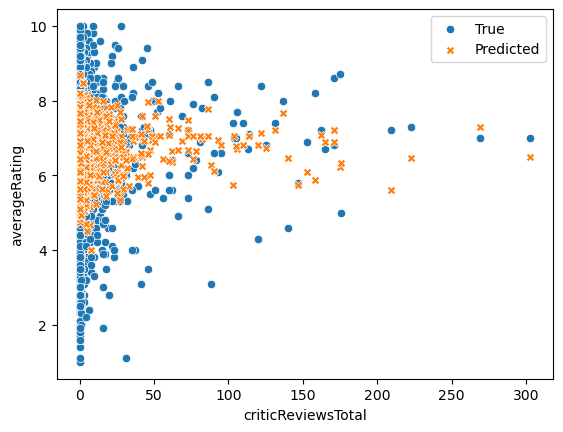

In [67]:
sns.scatterplot(data=test, x=xname, y=yname, label="True")
sns.scatterplot(data=test, x=xname, y=reg.predict(x_test), label="Predicted", marker="X")
plt.legend()
plt.show()

### Decision Tree regressor

In [69]:
reg = DecisionTreeRegressor()

In [70]:
reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [71]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.307
MSE: 2.395
MAE: 1.197


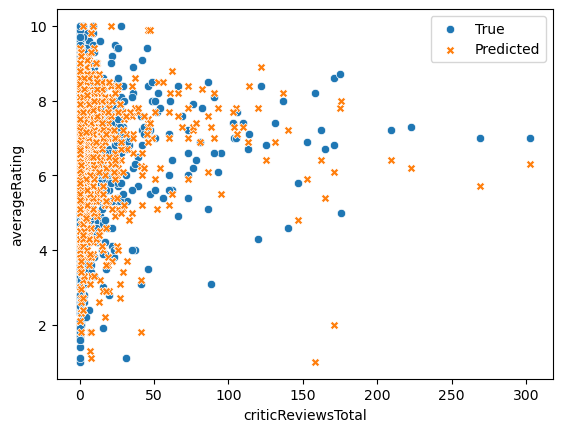

In [72]:
sns.scatterplot(data=test, x=xname, y=yname, label="True")
sns.scatterplot(data=test, x=xname, y=reg.predict(x_test), label="Predicted", marker="X")
plt.legend()
plt.show()

# Multivariate Regression (2+ target variables)

In [212]:
X_train = train[[xname, "awardNominationsExcludeWins", "userReviewsTotal", "totalCredits" ]].values
y_train = train[[yname, 'ratingCount']].values

X_test = test[[xname, "awardNominationsExcludeWins", "userReviewsTotal", "totalCredits" ]].values
y_test = test[[yname, "ratingCount"]].values


## DT

In [215]:
reg = DecisionTreeRegressor()

In [217]:
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [219]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.038
MSE: 35667864.331
MAE: 369.652


In [221]:
y_pred = reg.predict(X_test)
y_pred

array([[  6.66774194,  32.9483871 ],
       [  4.3       , 480.        ],
       [  6.64730539,  24.67065868],
       ...,
       [  6.62929293,  33.90909091],
       [  7.6       , 120.        ],
       [  6.72097902,  32.16783217]])

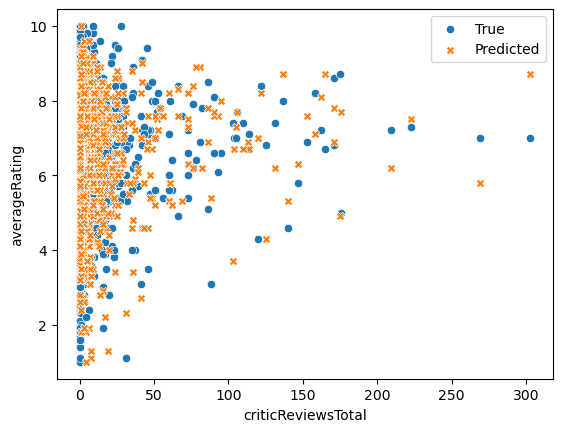

In [223]:
sns.scatterplot(data=test, x=xname, y=yname, label="True")
sns.scatterplot(data=test, x=xname, y=reg.predict(X_test)[:, 0], label="Predicted", marker="X")
plt.legend()
plt.show()

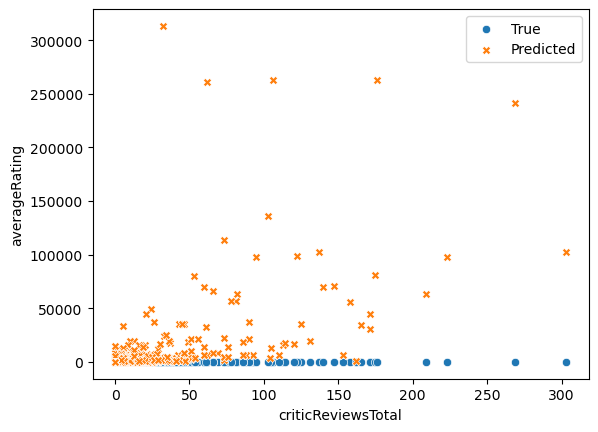

In [224]:
sns.scatterplot(data=test, x=xname, y=yname, label="True")
sns.scatterplot(data=test, x=xname, y=reg.predict(X_test)[:, 1], label="Predicted", marker="X")
plt.legend()
plt.show()

## KNN

In [228]:
reg = KNeighborsRegressor()

In [230]:
reg.fit(X_train, y_train)

KNeighborsRegressor()

In [232]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.198
MSE: 21170746.361
MAE: 302.063


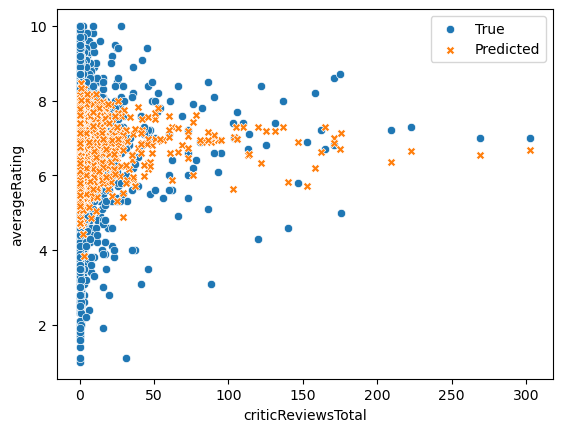

In [234]:
sns.scatterplot(data=test, x=xname, y=yname, label="True")
sns.scatterplot(data=test, x=xname, y=reg.predict(X_test)[:, 0], label="Predicted", marker="X")
plt.legend()
plt.savefig("knnmultiv.png", dpi=300, bbox_inches="tight")
plt.show()

## Linear

In [236]:
reg = LinearRegression()

In [237]:
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [[ 1.10808792e-03  8.71646188e-04 -2.34866734e-04 -8.10305144e-05]
 [ 3.83229280e+01 -6.38701111e+01  3.09701690e+02  1.87250395e+00]]
Intercept: 
 [   6.70950738 -889.70677713]


In [239]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.278
MSE: 22362791.310
MAE: 794.601


## Ri

In [244]:
reg = Ridge(alpha=100)
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [[ 1.10801733e-03  8.71030823e-04 -2.34829703e-04 -8.10264803e-05]
 [ 3.83236977e+01 -6.38167576e+01  3.09698701e+02  1.87233039e+00]]
Intercept: 
 [   6.7095074  -889.70662698]


In [246]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.278
MSE: 22362579.790
MAE: 794.595


## La

In [249]:
reg = Lasso(alpha=100)
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [[  0.           0.          -0.          -0.        ]
 [ 36.88797898 -51.00921908 309.56861982   1.80833384]]
Intercept: 
 [   6.70653021 -887.85472835]


In [251]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.279
MSE: 22325424.595
MAE: 792.909
